<a href="https://colab.research.google.com/github/jimmy0194/Reversed_Data_Decima_Airways_Summative_Coursework_Assessment/blob/main/Reversed_Data_Decima_Airways_Summative_Coursework_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRISP-DM Methodology Overview

*In this project, the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology was followed to guide the data-driven solution for predicting airline passenger satisfaction*

The six stages are outlined below:

**1. Business Understanding**
* **Objective:** Help Decima Airways understand key factors affecting customer satisfaction.
* **Problem:** Determine which service-related features influence whether passengers are “Satisfied” or “Unsatisfied.”

**2. Data Understanding**
*  **Dataset**: DECIMA_AIRWAYS_DATA_CW10.csv containing over 103,000 passenger records.
*  **Key columns explored:** Gender, Type of Travel, Class, Inflight service, Cleanliness, Flight Distance, etc.
*   **Initial steps:** Checked for duplicates, missing values, and column types.

**3. Data Preparation**
*   Removed duplicate records.
*   Dropped rows with missing target labels and handled remaining nulls.
*   Encoded categorical columns using LabelEncoder.
*  Created feature matrix X and target vector y, then split the data using train_test_split.

**4. Modeling**
*   Selected two models: Decision Tree Classifier and Random Forest Classifier.
*   Both models trained on the training data and tested using unseen data.
*   Performance measured using accuracy_score, confusion_matrix, and classification_report.
**5. Evaluation**
*   Evaluated models using metrics such as precision, recall, F1-score, and accuracy.
*   Feature importance from Random Forest helped interpret the drivers of satisfaction.
*   Confusion matrices visualized model performance.

**6. Deployment**

Although actual deployment is out of scope, all outputs (charts, Excel reports) are saved for presentation and potential upload to Decima Airways’ intranet.

# Flowchart Representation


Business Understanding

        ↓
  Data Understanding

        ↓
  Data Preparation

        ↓
     Modeling
        ↓
    Evaluation
        ↓
    Deployment



# Pseudocode: Decima Airways Passenger Satisfaction Analysis



# Decima Airways Passenger Satisfaction Analysis – Pseudocode

---

## Step 1: Setup and Data Import


BEGIN

IMPORT required libraries (pandas, numpy, seaborn, matplotlib, sklearn, etc.)

SET visualization style

LOAD dataset from Google Drive using public share link

PRINT shape and structure of dataset

END


---

## Step 2: Data Cleaning



BEGIN

DROP duplicate rows

REMOVE rows with missing 'Satisfied' target column

DROP all remaining null values

PRINT number of remaining nulls

END


---

## Step 3: Encode Categorical Columns


BEGIN

INITIALIZE LabelEncoder

FOR each categorical column in [Gender, Age Band, Type of Travel, Class, Continent, Satisfied]:

APPLY LabelEncoder to transform into numeric


END FOR

END

---

## Step 4: Exploratory Data Analysis (EDA)

BEGIN

PLOT histograms of all numerical features

PLOT boxplots to detect outliers


PLOT countplot of 'Satisfied' variable


PLOT c


---

## Step 5: Prepare Data for Modeling

BEGIN

DEFINE X = Features (all columns except 'Satisfied')

DEFINE y = Target (Satisfied)

SPLIT X and y into training and testing sets (test_size = 0.2)

END

---

## Step 6: Model Training and Evaluation

BEGIN

FOR model_type IN [DecisionTreeClassifier, RandomForestClassifier]:

INITIALIZE model with random_state

TRAIN model using X_train and y_train

PREDICT y_pred on X_test

CALCULATE accuracy score, confusion matrix, classification report

CALCULATE ROC curve and AUC

PLOT ROC curve

END FOR

END


---

## Step 7: Feature Importance of Random Forest

BEGIN

EXTRACT feature importances from trained Random Forest model

SORT and PLOT feature importances as barplot

END

**Note :** We selected **Decision Tree** because it’s easy to interpret and works well with both categorical and numerical data. **Random Forest** was chosen for its ability to reduce overfitting and improve accuracy through ensemble learning.

# Step 1.1: Setup, Data Load & Commenting
---

In [12]:
# Step 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Google Colab utility
from google.colab import files
# ScikitLearn Modules
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# plottingStyleSet
sns.set(style="whitegrid")
%matplotlib inline
from IPython.display import display

# Step 1.2: Load the dataset from Google Drive
---

In [2]:
# dataset from Google Drive
url = 'https://drive.google.com/uc?export=download&id=1tduaeH4ityLwYR-AW3TPqUwB0icOX1Eo'
df = pd.read_csv(url, encoding='ISO-8859-1')
print(f"Dataset Shape: {df.shape}")
print(df.info())

Dataset Shape: (103904, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wi

# Step 2: Data Cleaning

---

 **Adding clarity and logic explanations.**



In [3]:
# drop duplicaterows
df = df.drop_duplicates()
# Drop rows where target variable is missing
df = df[df['Satisfied'].notnull()]
# Drop nulls Values
df = df.dropna()

### Data Encoding
Categorical features such as `Gender`, `Age Band`, `Type of Travel`, and `Class` were encoded using `LabelEncoder` to convert text labels into numeric values required by scikit-learn models.


In [4]:
# Encoding the categorical columns
label_enc = LabelEncoder()
categorical_cols = ['Gender', 'Age Band', 'Type of Travel', 'Class', 'Continent', 'Satisfied']
for col in categorical_cols:
    df[col] = label_enc.fit_transform(df[col])  # Label encode directly
print("Remaining nulls:", df.isnull().sum().sum())

<ipython-input-4-5bc6825dc800>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = label_enc.fit_transform(df[col])  # Label encode directly


Remaining nulls: 0


# Step 3: EDA – Visual Feature Exploration

*This addresses for histograms, boxplots, and countplots.*

---
Visualize feature distributions

*Histogram for numeric features*

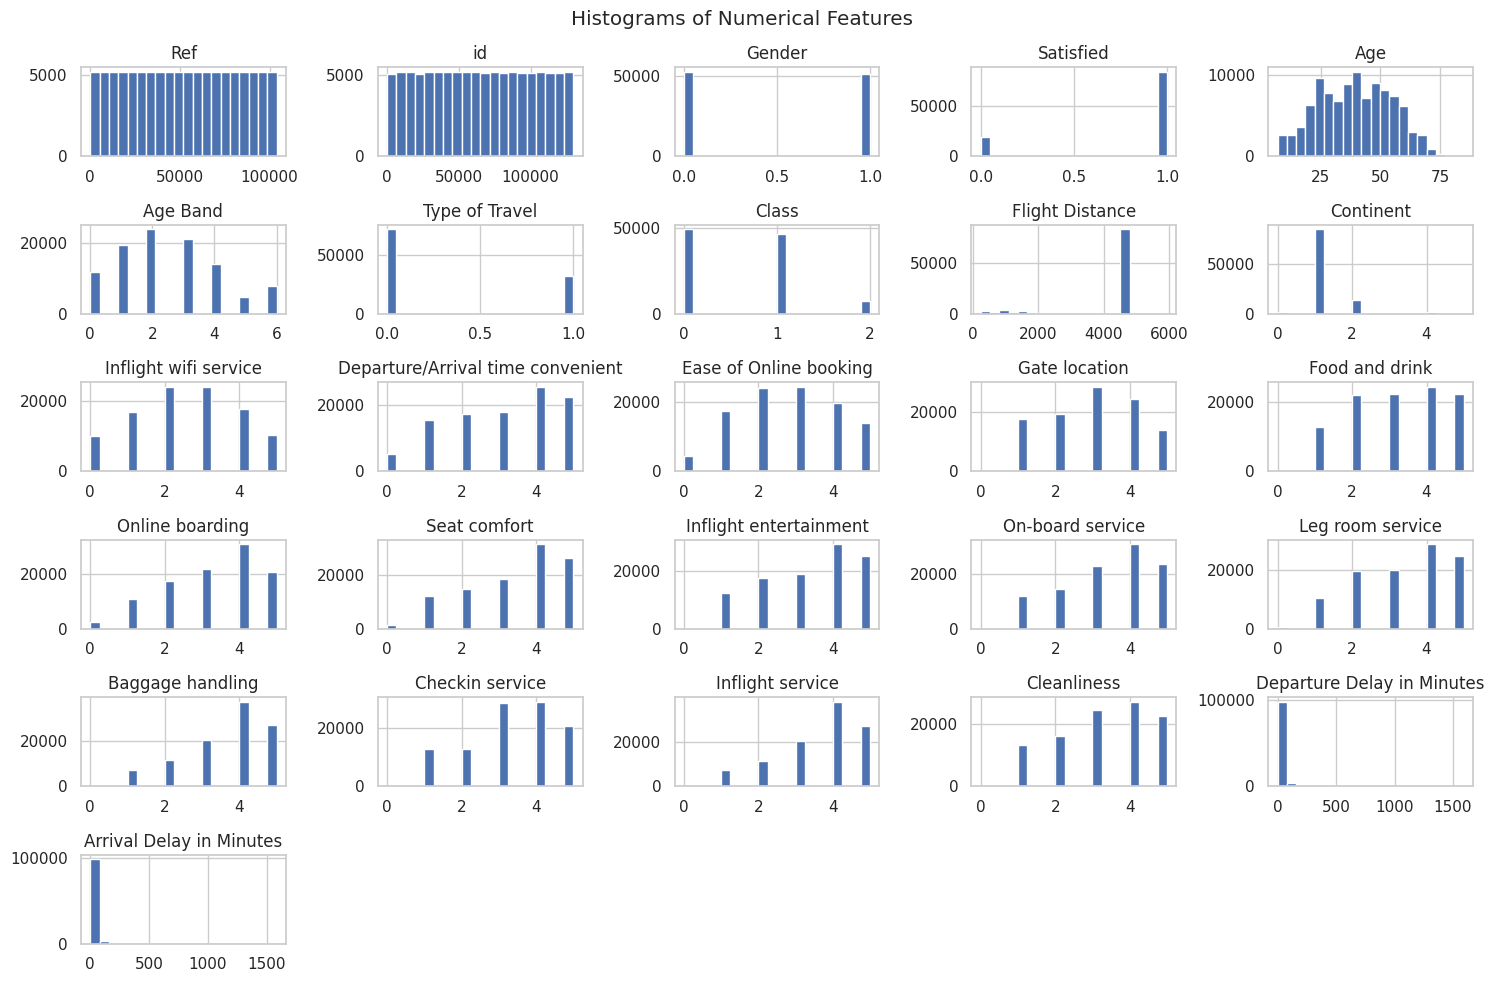

In [5]:
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.tight_layout()
plt.show()

*Boxplot for detecting outliers*

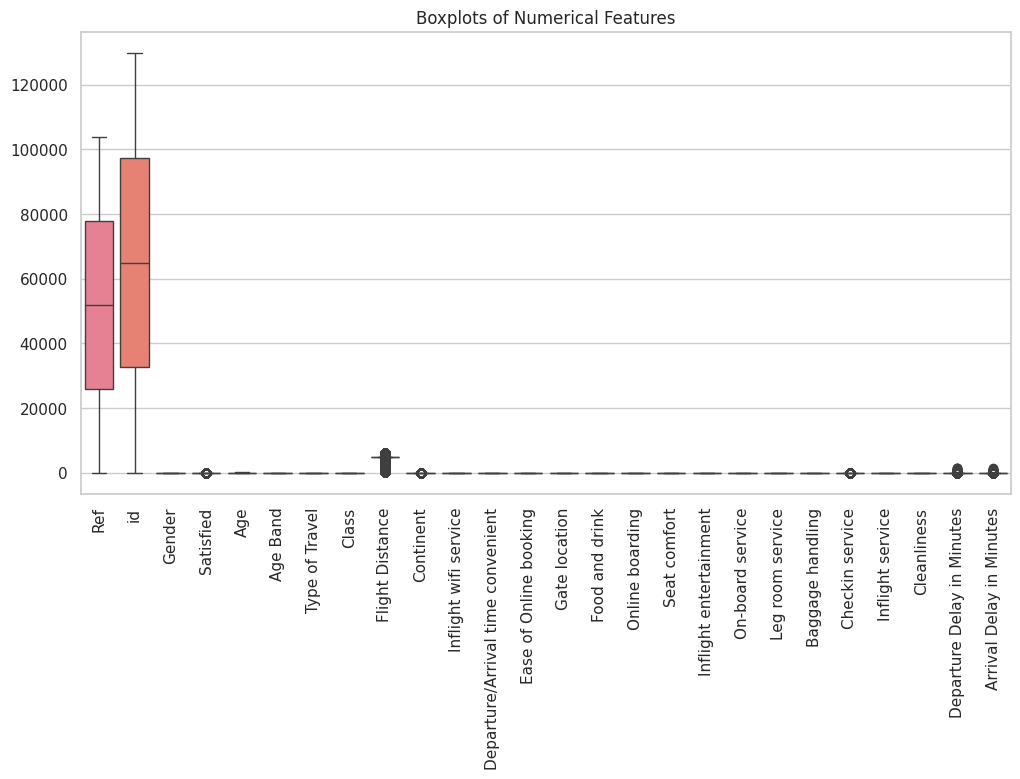

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=90)
plt.show()

Countplot of target variable

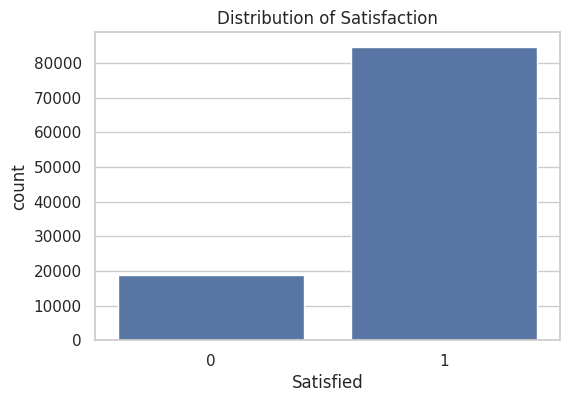

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Satisfied')
plt.title("Distribution of Satisfaction")
plt.show()

# Step 4: Correlation Matrix & Train-Test Split
---

### Model Evaluation
---
We used the following metrics to evaluate the models:
- **Accuracy**: Percentage of correctly predicted labels.
- **Classification Report**: Shows precision, recall, F1-score for each class.
- **Confusion Matrix**: Visualizes model performance for “Satisfied” vs. “Unsatisfied”.


*** Show correlation matrix for numerical features***

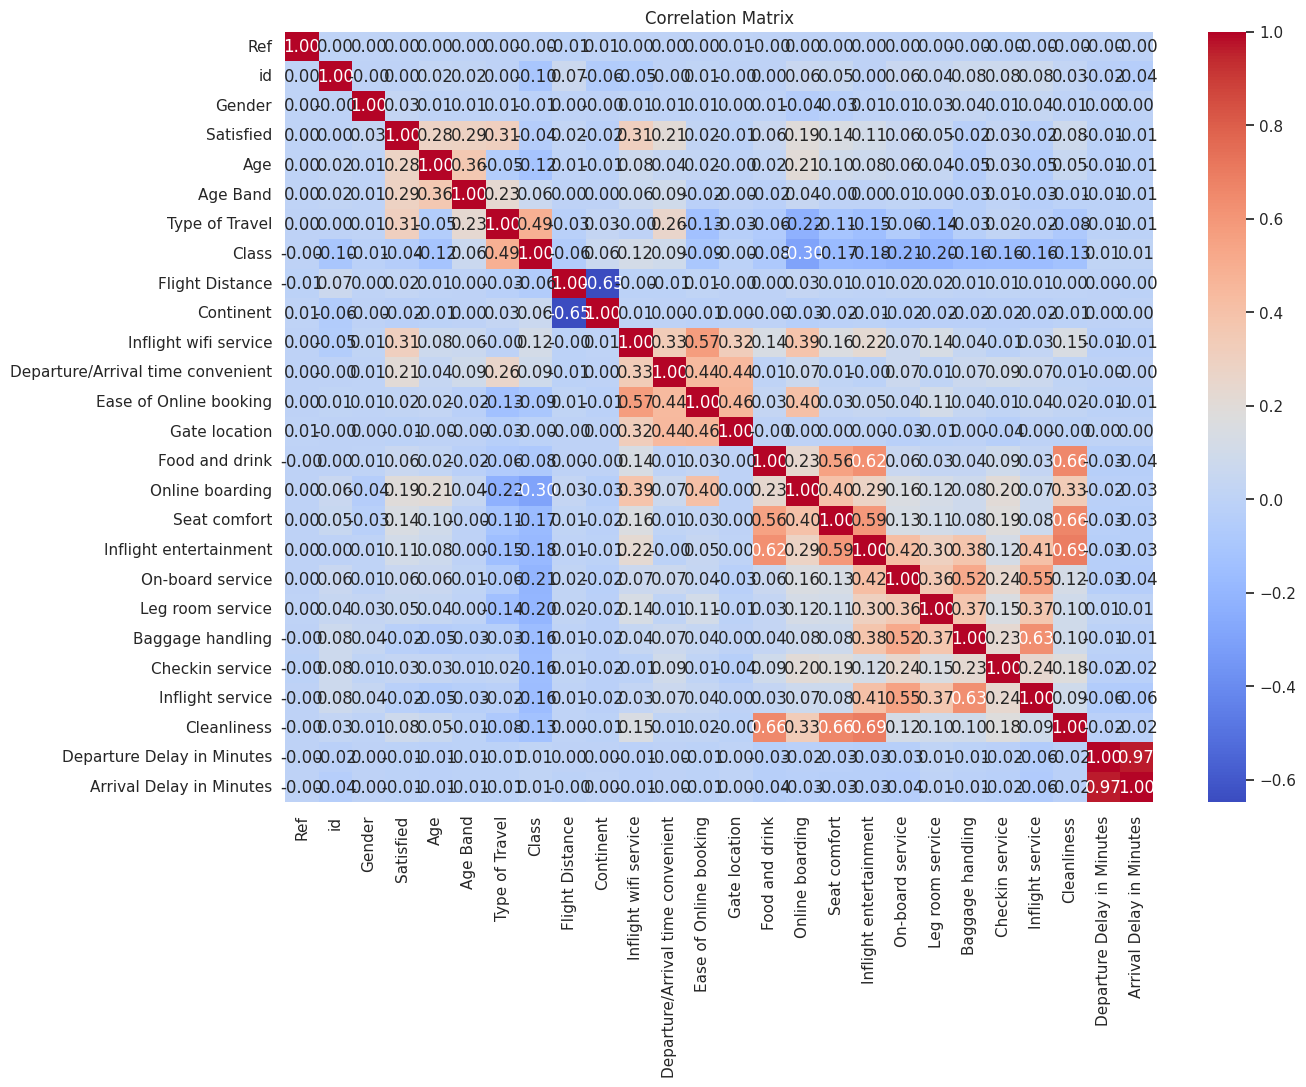

In [8]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

***fine features and target, and split the dataset***

In [20]:
# Drop columns that may not be useful for prediction
X = df.drop(columns=['Ref', 'id', 'Satisfied', 'Destination'])
y = df['Satisfied']
# Train-test split Performing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Confirming distribution of classes
print("Training Set Class Distribution:\n", y_train.value_counts(normalize=True))
print("Test Set Class Distribution:\n", y_test.value_counts(normalize=True))

Training Set Class Distribution:
 Satisfied
1    0.817219
0    0.182781
Name: proportion, dtype: float64
Test Set Class Distribution:
 Satisfied
1    0.817221
0    0.182779
Name: proportion, dtype: float64


# Step 5: Modularized Functions for Training & Evaluation

---

***Define training functions***

---

In [37]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from IPython.display import display

In [25]:
def train_model(model, X_train, y_train):
    """Fits the model to training data."""
    model.fit(X_train, y_train)
    return model

***Evaluting the Model with Classification Report***

---

In [51]:
def evaluate_model(model, X_test, y_test):
    """Evaluates the model and plots confusion matrix and ROC curve."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()


    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', label='Random Classifier')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()


# Step 6: Train Decision Tree & Random Forest with Feature Importance

---

***Calling With the Functions***

***Train and evaluate Decision Tree***

---

Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3787
           1       0.99      0.99      0.99     16932

    accuracy                           0.98     20719
   macro avg       0.97      0.97      0.97     20719
weighted avg       0.98      0.98      0.98     20719



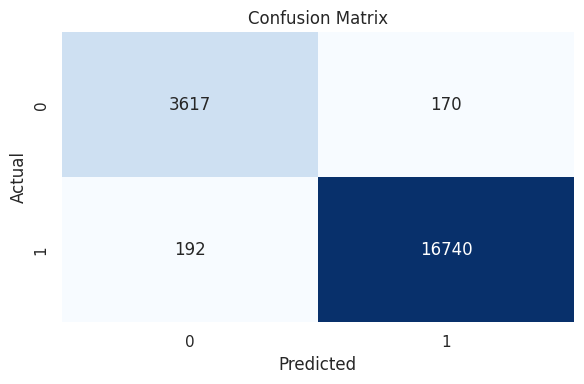

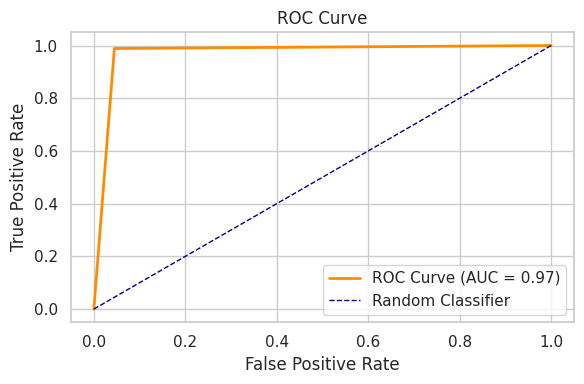

In [57]:
print("Decision Tree:")
dt_model = train_model(DecisionTreeClassifier(random_state=42), X_train, y_train)
evaluate_model(dt_model, X_test, y_test)

***Train and evaluate Random Forest***
---

Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      3787
           1       0.99      1.00      0.99     16932

    accuracy                           0.99     20719
   macro avg       0.99      0.98      0.98     20719
weighted avg       0.99      0.99      0.99     20719



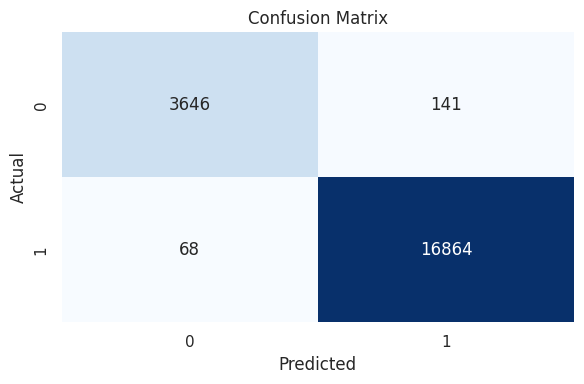

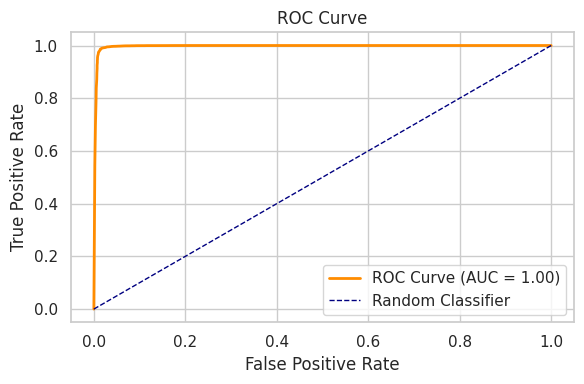

In [56]:
print("Random Forest:")
rf_model = train_model(RandomForestClassifier(random_state=42), X_train, y_train)
evaluate_model(rf_model, X_test, y_test)

# Plot feature importance from Random Forest
---

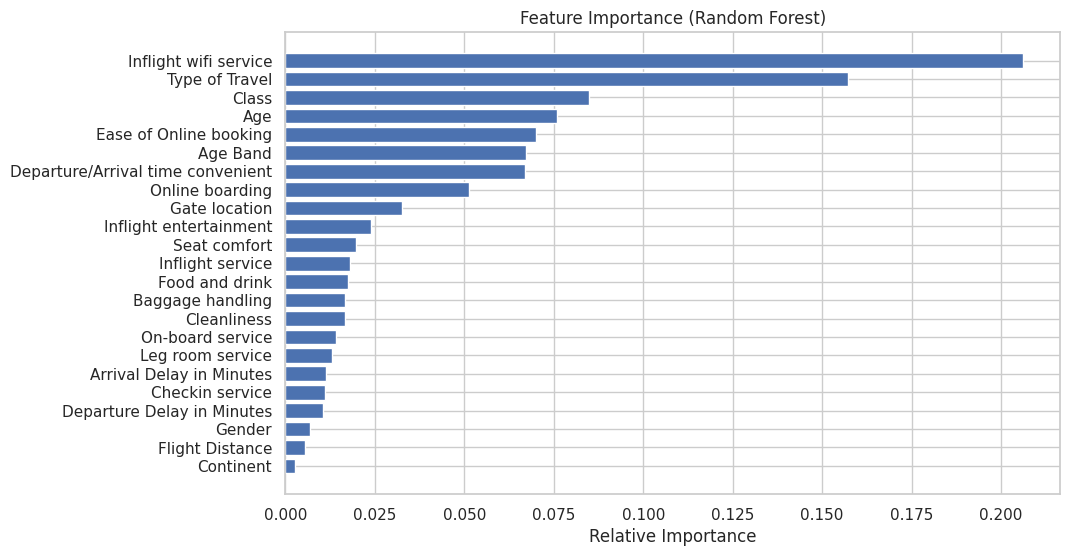

In [55]:
importances = rf_model.feature_importances_
feature_names = X.columns
# importances sorted
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.barh(range(len(importances)), importances[sorted_idx], align='center')
plt.yticks(np.arange(len(importances)), feature_names[sorted_idx])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Relative Importance')
plt.show()